C:\Users\neera\AppData\Local\Temp\ipykernel_28392\3219880307.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=role_satisfaction.values, y=role_satisfaction.index, palette="viridis")


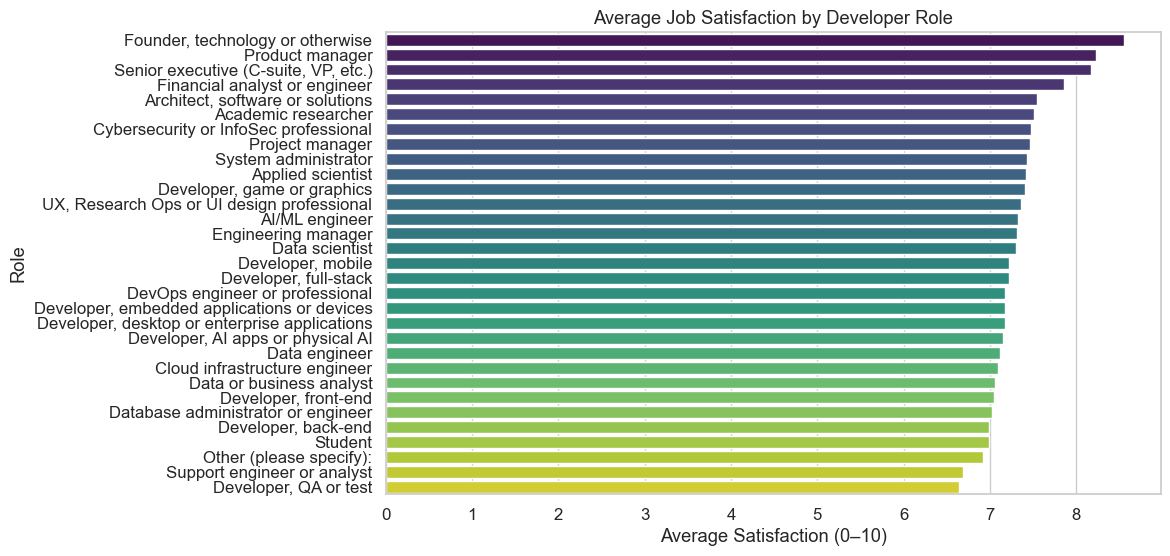

C:\Users\neera\AppData\Local\Temp\ipykernel_28392\3219880307.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_satisfaction.values, y=country_satisfaction.index, palette="mako")


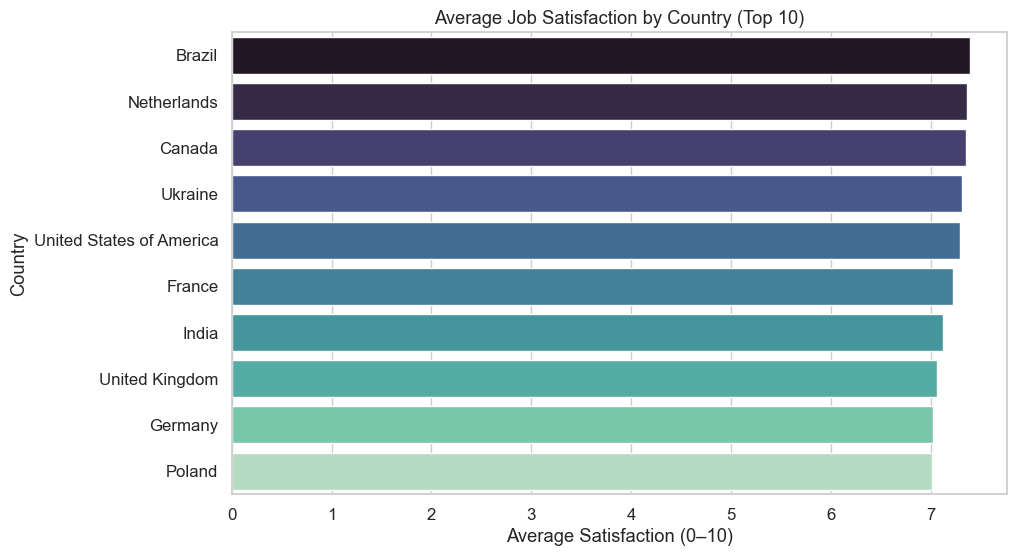

C:\Users\neera\AppData\Local\Temp\ipykernel_28392\3219880307.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_satisfaction.values, y=region_satisfaction.index, palette="cubehelix")


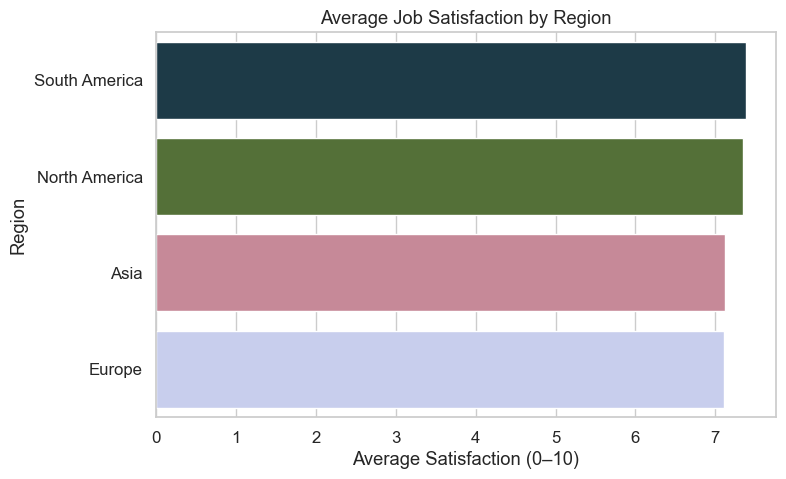

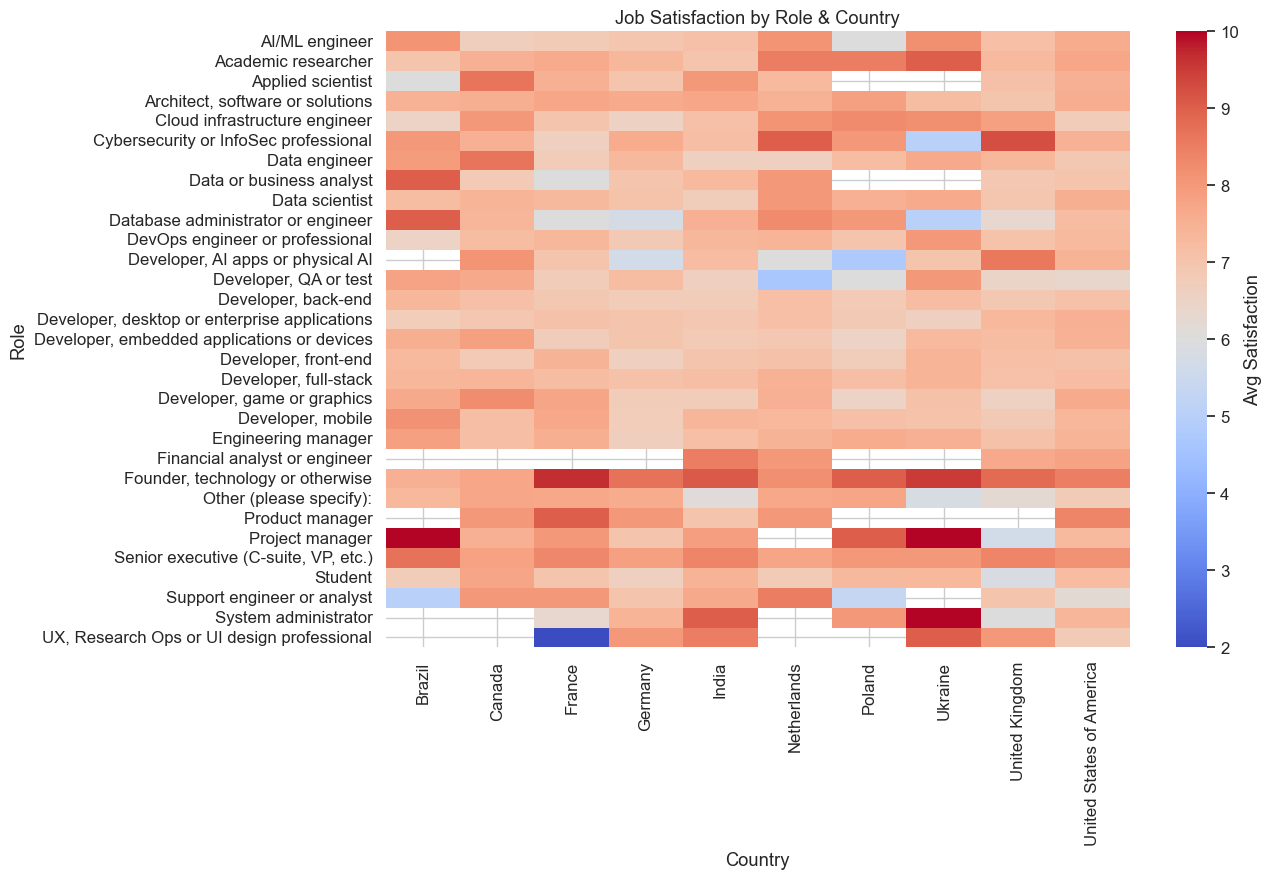


Key Findings:
1. Highest satisfaction roles: {'Founder, technology or otherwise': 8.55, 'Product manager': 8.23, 'Senior executive (C-suite, VP, etc.)': 8.17}
2. Countries with highest satisfaction: {'Brazil': 7.39, 'Netherlands': 7.36, 'Canada': 7.35}
3. Regions ranked by satisfaction: {'South America': 7.39, 'North America': 7.35, 'Asia': 7.12, 'Europe': 7.11}

Limitations:
- Data may be biased toward Stack Overflow users.
- Job satisfaction is self-reported and subjective.
- Sample sizes vary across countries/roles.

Next Steps:
- Compare satisfaction with salary levels.
- Explore satisfaction trends across multiple years.


In [ ]:
# ===============================================
# 1. Business Understanding
# ===============================================

# The goal is to explore job satisfaction among developers
# using the Stack Overflow Developer Survey 2025 dataset.
# We aim to answer:
# 1. Which developer roles report the highest job satisfaction?
# 2. How does job satisfaction vary across the top 10 countries?
# 3. Are there regional differences in job satisfaction?
# 4. Which roles are consistently satisfied across multiple countries?

# ===============================================
# 2. Data Understanding
# ===============================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Disabling warning from Seaborn for using palette without a hue 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Set visualization style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Load dataset (assume CSV is in same directory as notebook)
df = pd.read_csv("survey_results_public.csv")

# ===============================================
# 3. Data Preparation
# ===============================================

# Keep only relevant columns
df = df[["DevType", "Country", "JobSat"]]

# Drop rows with missing values
df = df.dropna(subset=["DevType", "Country", "JobSat"]) 

# Convert JobSat to numeric (scale 0–10)
df["JobSat"] = pd.to_numeric(df["JobSat"], errors="coerce")

# Merge United Kingdom + Ireland into United Kingdom
df["Country"] = df["Country"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom", "Ireland": "United Kingdom"})

# Focus on Top 10 Countries by response count
top_countries = df["Country"].value_counts().head(10).index
df = df[df["Country"].isin(top_countries)]

# Remove records where DevType contains 'Retired'
df = df[~df["DevType"].str.contains("Retired", case=False, na=False)]

# ===============================================
# 4. Analysis & Modeling
# ===============================================

# -------------------------------
# Q1: Which developer roles report the highest job satisfaction?
# -------------------------------
role_satisfaction = (
    df.groupby("DevType")["JobSat"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(x=role_satisfaction.values, y=role_satisfaction.index, palette="viridis")
plt.title("Average Job Satisfaction by Developer Role")
plt.xlabel("Average Satisfaction (0–10)")
plt.ylabel("Role")
plt.show()

# -------------------------------
# Q2: How does job satisfaction vary across the top 10 countries?
# -------------------------------
country_satisfaction = (
    df.groupby("Country")["JobSat"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(x=country_satisfaction.values, y=country_satisfaction.index, palette="mako")
plt.title("Average Job Satisfaction by Country (Top 10)")
plt.xlabel("Average Satisfaction (0–10)")
plt.ylabel("Country")
plt.show()

# -------------------------------
# Q3: Are there regional differences in job satisfaction?
# -------------------------------

# Region mapping for readability 
region_map = {
    "United States": "North America",
    "Canada": "North America",
    "United Kingdom": "Europe",
    "UK": "Europe",
    "Germany": "Europe",
    "France": "Europe",
    "India": "Asia",
    "China": "Asia",
    "Brazil": "South America",
    "Australia": "Oceania",
    "Netherlands": "Europe"
}

df["Region"] = df["Country"].map(region_map)

region_satisfaction = (
    df.groupby("Region")["JobSat"]
    .mean()
    .round(2)
    .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x=region_satisfaction.values, y=region_satisfaction.index, palette="cubehelix")
plt.title("Average Job Satisfaction by Region")
plt.xlabel("Average Satisfaction (0–10)")
plt.ylabel("Region")
plt.show()

# -------------------------------
# Q4: Which roles are consistently satisfied across multiple countries?
# -------------------------------
pivot = df.pivot_table(
    values="JobSat", index="DevType", columns="Country", aggfunc="mean"
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot, cmap="coolwarm", annot=False, cbar_kws={'label': 'Avg Satisfaction'})
plt.title("Job Satisfaction by Role & Country")
plt.xlabel("Country")
plt.ylabel("Role")
plt.show()

# ===============================================
# 5. Evaluation & Communication
# ===============================================

# Summarize key findings (to be expanded in Markdown/Blog)
print("\nKey Findings:")
print("1. Highest satisfaction roles:", role_satisfaction.head(3).to_dict())
print("2. Countries with highest satisfaction:", country_satisfaction.head(3).to_dict())
print("3. Regions ranked by satisfaction:", region_satisfaction.to_dict())

print("\nLimitations:")
print("- Data may be biased toward Stack Overflow users.")
print("- Job satisfaction is self-reported and subjective.")
print("- Sample sizes vary across countries/roles.")

print("\nNext Steps:")
print("- Compare satisfaction with salary levels.")
print("- Explore satisfaction trends across multiple years.")


